# Creación de un ejemplo adversarial

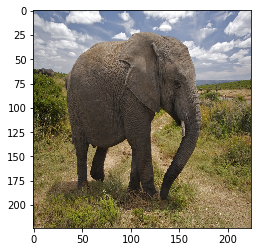

In [52]:

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten ,Input
from keras.layers import Conv2D, MaxPooling2D, Reshape, Add
from keras.metrics import categorical_accuracy
from keras.regularizers import l1_l2, l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from tensorflow.python.keras import backend as K
from keras.preprocessing.image import array_to_img,img_to_array

import matplotlib.pyplot as plt
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
##Funciones auxiliares
def plotImage( img, dims = False ):
    if not(dims):
        plt.imshow(img, vmin=0., vmax=1.)
    else: 
        plt.imshow(img.reshape(dims), vmin=0., vmax=1.)
    plt.show()
        

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plotImage(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x_not_pre = x
x = preprocess_input(x)





Eligamos una imagen para crear ejemplo adversarial

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


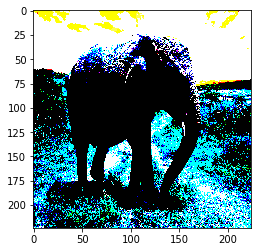

In [69]:
#select image to create an adversarial example from
img = x
plt.imshow(img.reshape((224,224,3)),vmin=0., vmax=1.)
plt.show()

Veamos qué clasificacion da el modelo

In [31]:
preds = model.predict(x)
print(preds.shape)
target = np.zeros((1,1000))
target[0,4] = 1
print('Predicted:', decode_predictions(target, top=3)[0])
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

(1, 1000)
Predicted: [('n01494475', 'hammerhead', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0)]
Predicted: [('n02504458', 'African_elephant', 0.86625427), ('n02504013', 'Indian_elephant', 0.06860924), ('n01871265', 'tusker', 0.06478469)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


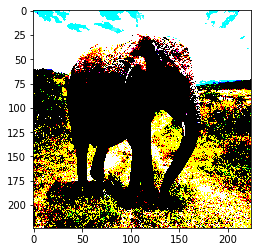

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  2.3199997  21.221      56.060997 ]
  [-10.68       10.221001   49.060997 ]
  [ -9.68       14.221001   57.060997 ]
  ...
  [ 87.32       95.221     113.061    ]
  [ 94.32      102.221     120.061    ]
  [ 90.32       98.221     116.061    ]]

 [[ -3.6800003  14.221001   49.060997 ]
  [ -6.6800003  12.221001   51.060997 ]
  [ -3.6800003  18.221      62.060997 ]
  ...
  [ 94.32      100.221     119.061    ]
  [ 99.32      106.221     127.061    ]
  [ 86.32       93.221     114.061    ]]

 [[ -9.68        9.221001   46.060997 ]
  [  2.3199997  23.221      62.060997 ]
  [-14.68        7.2210007  49.060997 ]
  ...
  [101.32      107.221     125.061    ]
  [ 86.32       96.221     116.061    ]
  [ 71.32       81.221     101.061    ]]

 ...

 [[-67.68      -77.779     -90.939    ]
  [-15.68      -32.779     -45.939003 ]
  [ -7.6800003 -29.779     -46.939003 ]
  ...
  [ 32.32       19.221      -2.939003 ]
  [ 25.32        8.221001  -16.939003 ]
  [ 36.32       19.221      -5.939003 ]]

 [

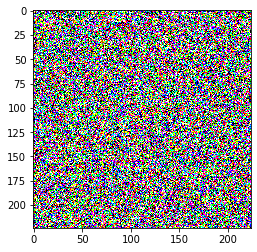

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


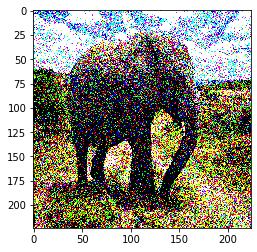

Predicted: [('n02504458', 'African_elephant', 0.78555703), ('n01871265', 'tusker', 0.16953935), ('n02504013', 'Indian_elephant', 0.03376434)]


In [59]:
#applying random noise does not fool the classifier
#quantized_noise = np.round(np.random.normal(loc=0.0, scale=0.3, size=img.shape) * 255.) / 255.
quantized_noise = np.round(np.random.normal(loc=0.0, scale=0.2, size=x_not_pre.shape) * 255.)
#noisy_img = np.clip(img + quantized_noise, 0., 1.)
#plt.imshow(quantized_noise[0],vmin=0., vmax=1.)
plotImage(x_not_pre[0])
print(x_not_pre[0])
#plt.show()
plotImage(quantized_noise[0])
noisy_img = x_not_pre[0] + quantized_noise[0]
print(noisy_img.shape)
plotImage(noisy_img)
noisy_img_pre = np.expand_dims(noisy_img, axis=0)
noisy_img_pre = preprocess_input(noisy_img_pre)
preds = model.predict(noisy_img_pre)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#### AQUI HAY ERROR
print('Predicted:', decode_predictions(preds, top=3)[0])

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 52.8016 - categorical_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 226ms/step - loss: 49.7248 - categorical_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 213ms/step - loss: 47.4781 - categorical_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 217ms/step - loss: 45.4459 - categorical_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 213ms/step - loss: 43.4639 - categorical_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 241ms/step - loss: 41.5069 - categorical_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 210ms/step - loss: 39.5406 - categorical_accuracy: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 203ms/step - loss: 37.5940 - categorical_accuracy: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 200ms/step - loss: 35.6448 - c

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


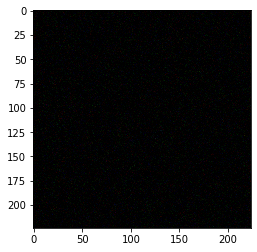

TypeError: Invalid shape (1, 224, 224, 3) for image data

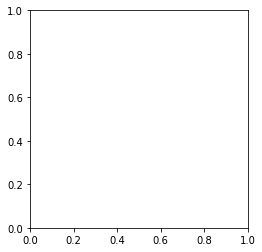

In [66]:

#custom activation function for keeping adversarial pixel values between 0.0 and 1.0
def clip(x):
    return K.clip(x, 0.0, 1.0)

#custom loss funciton for non-targeted misclassification
def negative_categorical_crossentropy(yTrue,yPred):
    return 0.0 - K.categorical_crossentropy(yTrue,yPred)

#custom activation to transform image to resnet input format
def preprocessImg(img):
    #noisy_img_pre = np.expand_dims(noisy_img, axis=0)
    #noisy_img_pre = preprocess_input(noisy_img_pre)
    return preprocess_input(img)

#add custom objects to dictionary
get_custom_objects().update({'clip': Activation(clip)})
get_custom_objects().update({'negative_categorical_crossentropy': negative_categorical_crossentropy})
get_custom_objects().update({'preprocess': preprocessImg})

adversarial_model = False
#function for generating an adversarial example given a base image, adversarial class target, classifier, and regularization type
def generate_adversary(img,target,model,regularization,loss_function):
    
    #input for base image
    image = Input(shape=(224,224,3),name='image')
    #unit input for adversarial noise
    one = Input(shape=(1,),name='unity')
    
    #layer for learning adversarial noise to apply to image
    noise = Dense(224*224*3,activation = None,use_bias=False,kernel_initializer='random_normal',
                  kernel_regularizer=regularization, name='adversarial_noise')(one)
    
    #reshape noise in shape of image
    noise = Reshape((224,224,3),name='reshape')(noise)
    
    #add noise to image
    net = Add(name='add')([noise,image])
    #clip values to be within 0.0 and 1.0
    #net = Activation('clip',name='clip_values')(net)
    
    #add preprocess activation
    net = Activation('preprocess',name='pre_values')(net)
    
    #feed adversarial image to trained MNIST classifier
    outputs = model(net)

    adversarial_model = Model(inputs=[image,one], outputs=outputs)
    #freeze trained MNIST classifier layers
    adversarial_model.layers[-1].trainable = False
    
    adversarial_model.compile(optimizer='nadam', loss=loss_function, metrics=[categorical_accuracy])
        
    #target adversarial classification
    target_vector = np.zeros(1000)
    target_vector[target] = 1.
    
    #callback for saving weights with smallest loss
    checkpoint = ModelCheckpoint('./adversarial_weights_resnet.h5', monitor='loss', verbose=0, save_best_only=True, save_weights_only=True,
                                 mode='auto', period=1)
    #train adversarial image
    adversarial_model.fit(x={'image':img,'unity':np.ones(shape=(1,1))},y=target_vector.reshape(1,-1),epochs=20,verbose=1,
                         callbacks=[checkpoint])
    #restore best weights
    adversarial_model.load_weights('./adversarial_weights_resnet.h5')
    
    #quantize adversarial noise
    quantized_weights = np.round(adversarial_model.get_weights()[0].reshape((224,224,3)) * 255.) / 255.
    weights = adversarial_model.get_weights()[0].reshape((224,224,3))
    #add trained weights to original image and clip values to produce adversarial image
    plotImage(weights)
    #adversarial_img = np.clip(img.reshape((224,224,3)) + quantized_weights, 0., 1.)
    adversarial_img = img + weights
    
    #display adversarial image
    plt.imshow(adversarial_img,vmin=0., vmax=1.)
    plt.show()
    #classify adversarial image
    #adversarial_prediction = mnist_model.predict(adversarial_img.reshape((1,28,28,1)))
    #print(adversarial_prediction)
    adversarial_img = np.expand_dims(adversarial_img, axis=0)
    adversarial_img = preprocess_input(adversarial_img)
    model.predict(adversarial_img)
    
    return adversarial_img

generate_adversary(x_not_pre,5,model,l1(0.01),'negative_categorical_crossentropy')


In [67]:
#restore best weights
adversarial_model.load_weights('./adversarial_weights_resnet.h5')

AttributeError: 'bool' object has no attribute 'load_weights'